<a href="https://colab.research.google.com/github/hamdi-trikii/sampleOf_ML_Basics_projects/blob/main/ML_AI_Foundations_Section9_Lab9_Triki_hamdi_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Objectives:**

-  Understand how dataset imbalance can introduce bias
-  Train a classifier on biased data
-  Evaluate fairness across groups (gender, age, etc.)
-  Explore fairness metrics (accuracy, precision, recall by subgroup)
-  Reflect on responsible AI and future challenges

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

Step 1 — Simulate biased dataset


In [3]:
#We’ll simulate a dataset where one group (e.g., Group A) has far fewer positive samples.
# Synthetic dataset: 1000 samples, binary target

X, y = make_classification(n_samples=1000, n_features=5,
                           n_informative=3, n_redundant=1,
                           weights=[0.7, 0.3], random_state=42)
"""
X, y = make_classification(...): This line generates a synthetic dataset.
n_samples=1000 creates 1000 data points.
n_features=5 means each data point has 5 features. n_informative=3 and n_redundant=1
specify how many features are useful for predicting the target and how many are redundant,respectively.
 Crucially, weights=[0.7, 0.3] creates an imbalanced binary target variable (y)
 meaning 70% of the samples belong to one class and 30% to the other.
 random_state=42 ensures reproducibility.
"""


# Add a "protected attribute" (e.g., gender: 0=female, 1=male)
np.random.seed(42)

gender = np.random.choice([0,1], size=1000, p=[0.7,0.3])
 # imbalanced distrib

df = pd.DataFrame(X, columns=[f"feature_{i}" for i in range(5)])

df['target'] = y

df['gender'] = gender

df.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,target,gender
0,-0.038769,-0.649239,-0.224746,-1.346275,0.126879,0,0
1,1.005284,-1.373239,1.157346,0.126493,1.422799,0,1
2,-0.742455,-0.573257,1.688442,-2.588237,0.762562,0,1
3,-1.587158,1.758582,-0.930664,0.764614,2.415399,1,0
4,-0.941758,0.367913,-0.549360,-2.029919,-1.503957,0,0


Step 2 — Split data

In [5]:
X = df.drop(columns=['target'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.3, random_state=42
)

Step 3 — Train classifier


In [6]:
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Overall Accuracy:", acc)

Overall Accuracy: 0.9433333333333334


Step 4 — Fairness evaluation across groups


In [7]:
results = []

for g in [0,1]:
  mask = (X_test['gender'] == g)
  acc_g = accuracy_score(y_test[mask], y_pred[mask])
  prec_g = precision_score(y_test[mask], y_pred[mask])
  rec_g = recall_score(y_test[mask], y_pred[mask])
  results.append({'Group': g, 'Accuracy': acc_g,
    'Precision': prec_g, 'Recall': rec_g})


df_results = pd.DataFrame(results)
print(df_results)

   Group  Accuracy  Precision    Recall
0      0  0.959276   0.939394  0.925373
1      1  0.898734   0.894737  0.739130


Step 5 — Visualize disparity

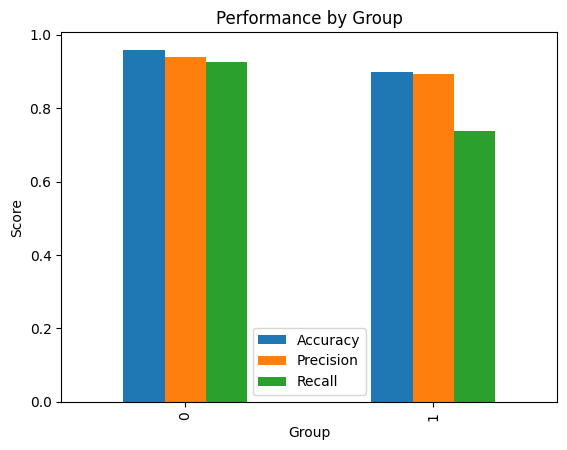

In [10]:
df_results.set_index('Group')[['Accuracy','Precision','Recall']].plot(kind='bar')
plt.title("Performance by Group")
plt.ylabel("Score")
plt.show()

Step 6 — Discussion on mitigation strategies4

+  Collect more balanced data
+  Use fairness-aware algorithms
+  Re-sample or re-weight training data
+  Monitor models in production



Step 7 — Reflection Questions
1. Did the model perform equally well for both groups? Why or why not?
2. How does imbalanced data lead to unfair predictions?
3. Which fairness metrics (accuracy, precision, recall) best capture inequality?
4. What steps would you recommend to mitigate bias in real-world AI systems?
5. Looking ahead, what ethical challenges do you see with AI in society (e.g., privacy, job
displacement, autonomous weapons)?